<a href="https://colab.research.google.com/github/curiasuncc/4106-Real-time-ML/blob/main/hw1prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
import torch
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [309]:
def model(t_u, w, b):
  #return w * t_u + b
  return w * t_u * 2 + w * t_u + b

In [310]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [311]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([107.1000, 167.7000, 174.6000, 245.7000, 168.9000, 146.7000, 101.7000,
         65.4000, 145.2000, 181.2000, 205.2000])

In [312]:
loss = loss_fn(t_p, t_c)
loss

tensor(22561.6719)

In [313]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f" z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [314]:
delta = 0.1
loss_rate_of_change_w = \
(loss_fn(model(t_u, w + delta, b), t_c) -
loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [315]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [316]:
loss_rate_of_change_b = \
(loss_fn(model(t_u, w, b + delta), t_c) -
loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

In [317]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

In [318]:
def dmodel_dw(t_u, w, b):
  return t_u

In [319]:
def dmodel_db(t_u, w, b):
  return 1.0

In [320]:
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [321]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad
    print('Epoch %d, Loss %f' % (epoch, float(loss)))
  return params

In [322]:
t_un = 0.1 * t_u


In [323]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 1, Loss 42.768204
Epoch 2, Loss 42.281979
Epoch 3, Loss 41.812904
Epoch 4, Loss 41.360367
Epoch 5, Loss 40.923798
Epoch 6, Loss 40.502625
Epoch 7, Loss 40.096294
Epoch 8, Loss 39.704296
Epoch 9, Loss 39.326107
Epoch 10, Loss 38.961266
Epoch 11, Loss 38.609272
Epoch 12, Loss 38.269688
Epoch 13, Loss 37.942078
Epoch 14, Loss 37.626011
Epoch 15, Loss 37.321079
Epoch 16, Loss 37.026890
Epoch 17, Loss 36.743069
Epoch 18, Loss 36.469238
Epoch 19, Loss 36.205063
Epoch 20, Loss 35.950184
Epoch 21, Loss 35.704285
Epoch 22, Loss 35.467041
Epoch 23, Loss 35.238144
Epoch 24, Loss 35.017300
Epoch 25, Loss 34.804237
Epoch 26, Loss 34.598671
Epoch 27, Loss 34.400333
Epoch 28, Loss 34.208969
Epoch 29, Loss 34.024342
Epoch 30, Loss 33.846207
Epoch 31, Loss 33.674332
Epoch 32, Loss 33.508499
Epoch 33, Loss 33.348499
Epoch 34, Loss 33.194107
Epoch 35, Loss 33.045151
Epoch 36, Loss 32.901424
Epoch 37, Loss 32.762745
Epoch 38, Loss 32.628933
Epoch 39, Loss 32.499817
Epoch 40, Loss 32.375229
Epoch 41,

tensor([ 0.8588, -1.4733])

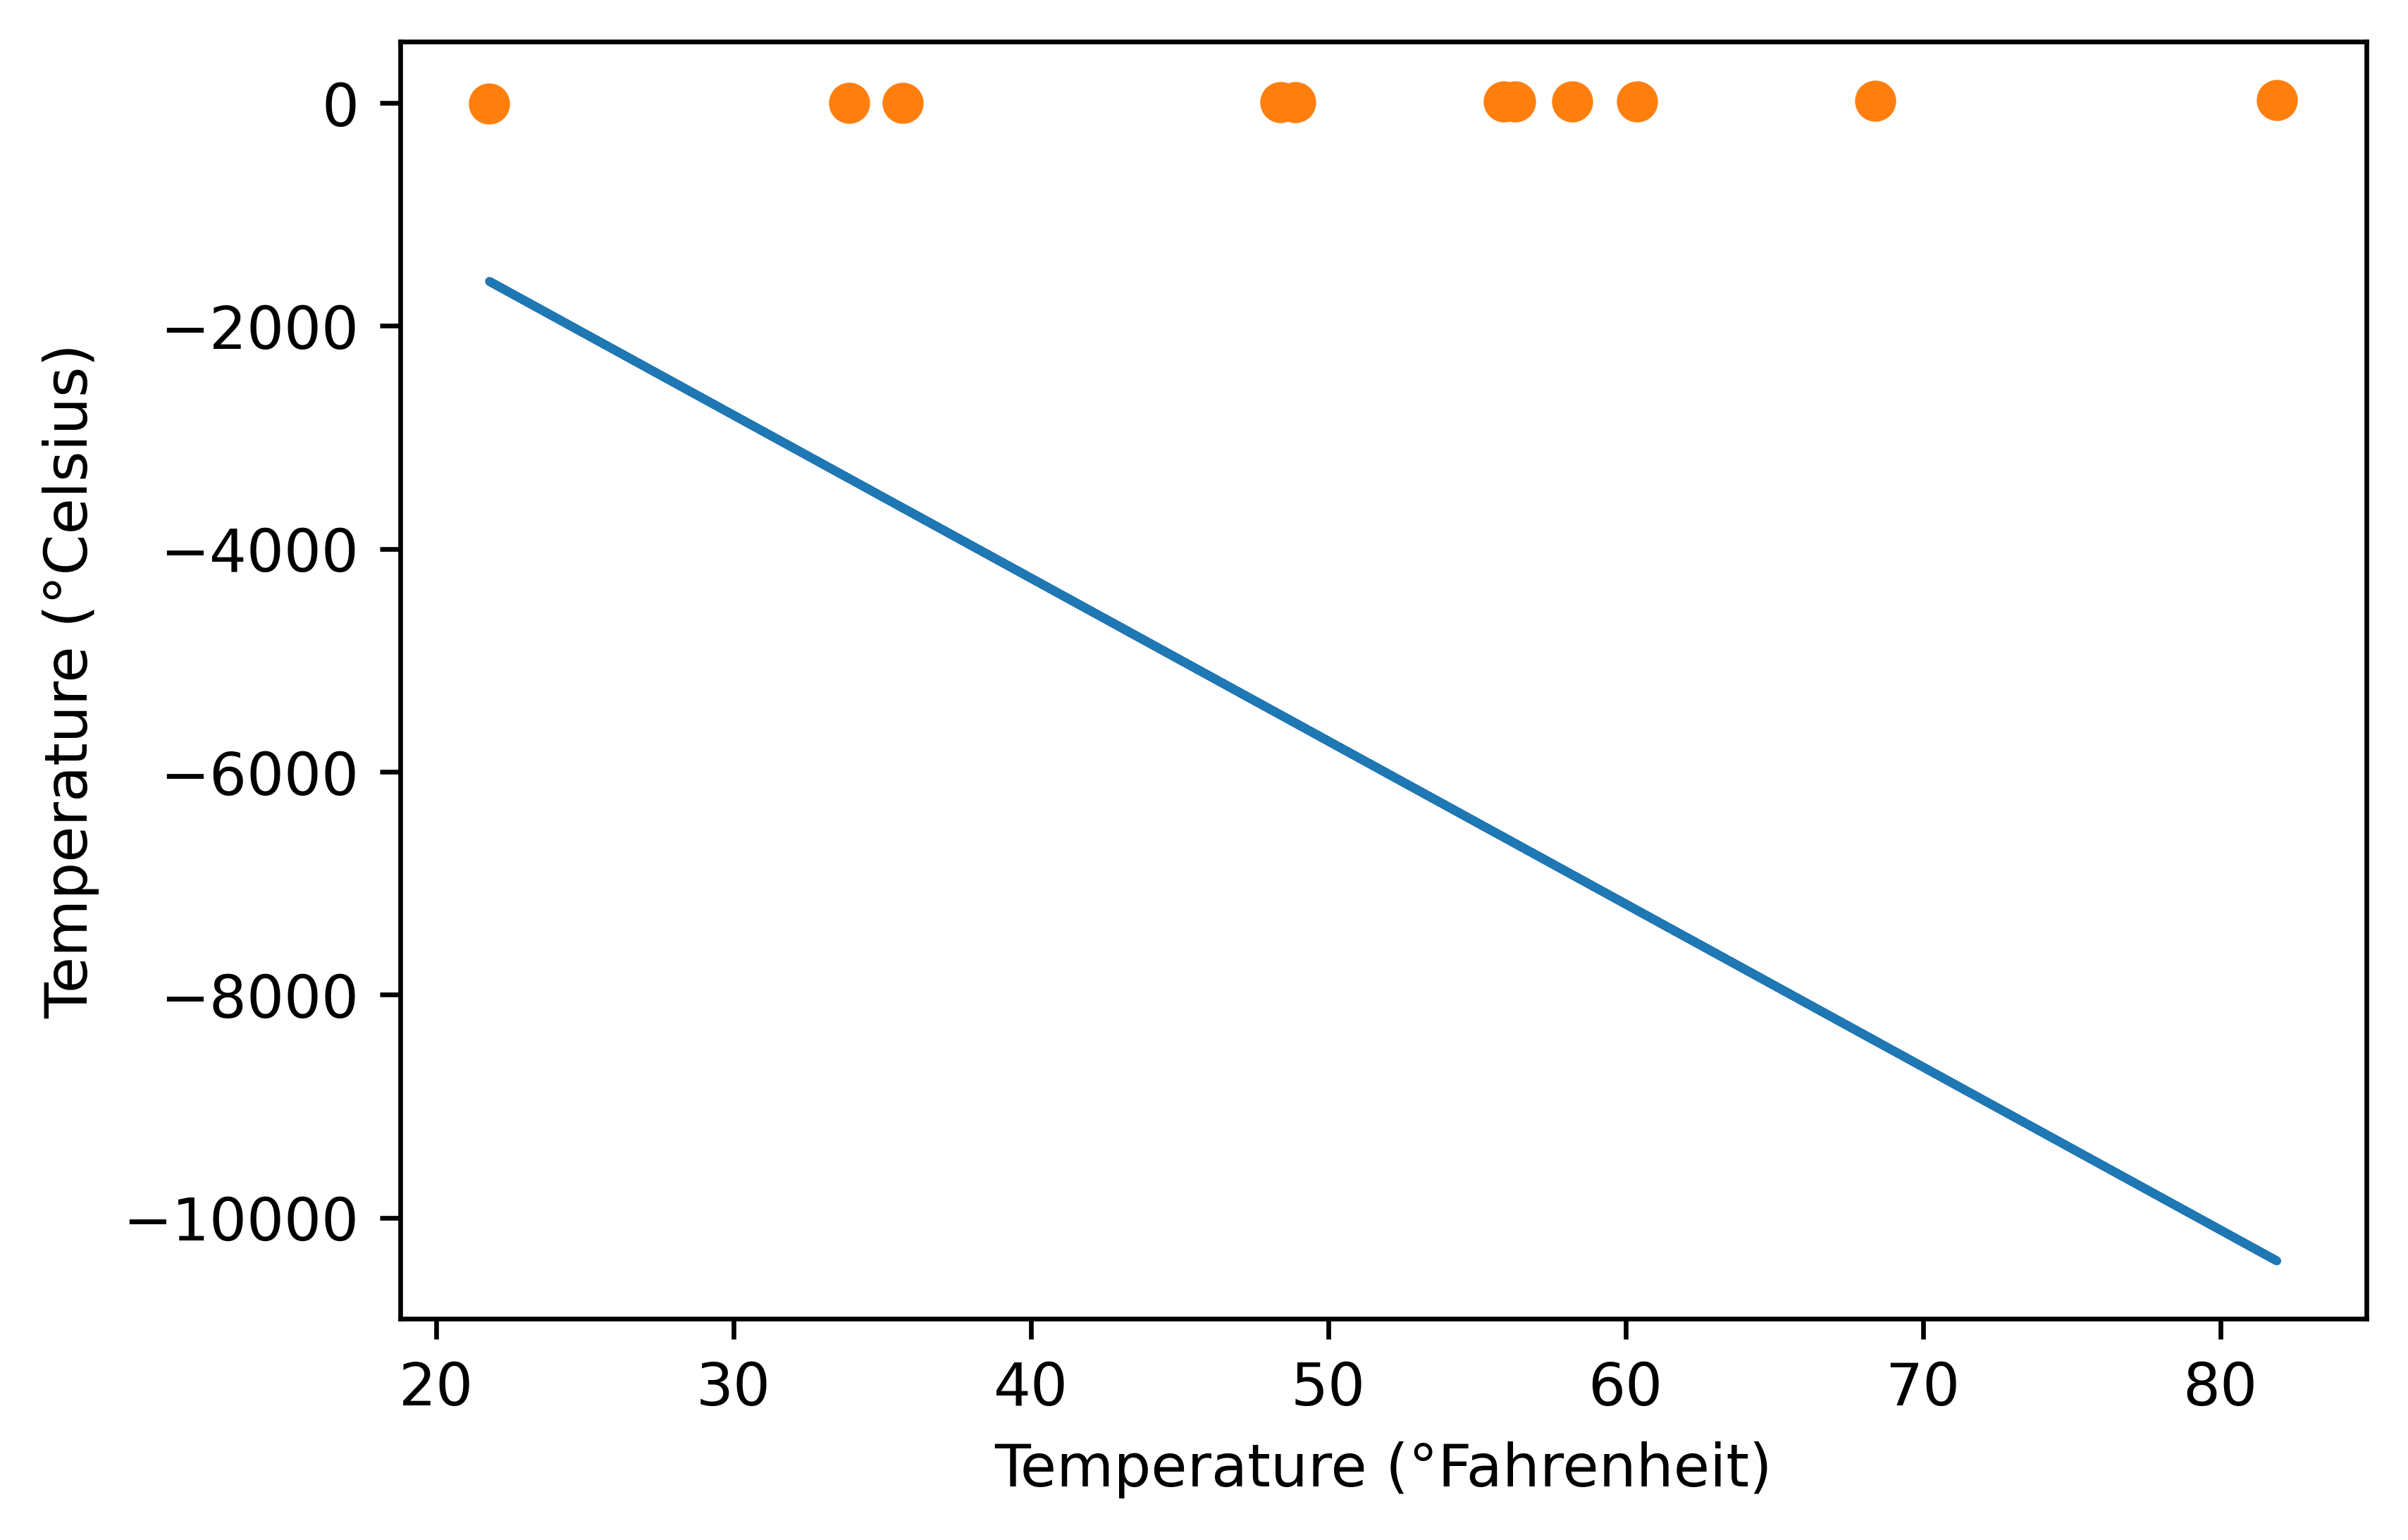

In [324]:

from matplotlib import pyplot as plt
t_p = model(t_un, w,b)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')